# Feature Scaling

Nesse notebook vamos ver com podemos realizar o scaling dos atributos da nossa base. Estaremos demostrando duas técnicas: padronização e normalização

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()

## Carregando e analisando a base

Vamos carregar a base que usaremos nos nossos exemplos

In [2]:
df = pd.read_csv('boston.csv')

# Separando target e features, vai ser util mais tarde
target = 'target'
features = [col for col in df.columns if col != target]

In [3]:
df.shape

(506, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Vamos analisar a escala das features presentes na base

In [5]:
df.describe().T # .T é para transpor a matriz para facilitar visualização

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647422,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


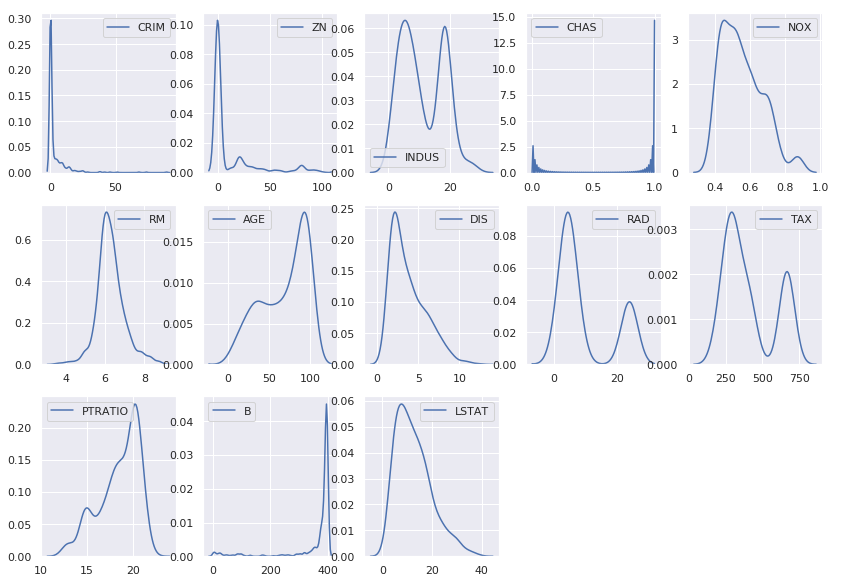

In [6]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(14,10))

for i, feat in enumerate(features):
    sns.kdeplot(df[feat], ax=ax[i // 5, i % 5])

ax[2,3].axis('off')
ax[2,4].axis('off')

plt.show()

Podemos ver que as features estão em escalar completamente diferentes

Vamos treinar um KNN (que é um algoritmo sensível a escala dos dados) e ver o resultado que obtemos

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=43)

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Erro quadrado médio: {mse : .4f}')

Erro quadrado médio:  46.7335


## Scaling dos atributos

### Padronização (z-score)

- Padronizacão, ou também chamado de z-score, é um tipo de scaling que aproxima os dados por uma distribuição normal de média 0 e desvio padrão 1.
- Segue a formula a seguir:
    ## $$ x_i' = \frac{x_i - \mu}{\sigma} $$
onde $ \mu $ é a média do atributo e $ \sigma $ seu desvio padrão


In [8]:
# Criar uma cópia do nosso DataFrame
df_standard = df.copy(deep=True)

# Instanciando o objeto que faz a padronização
scaler = StandardScaler()

# Fazendo o scaling
scaler.fit(df_standard[features])
df_standard[features] = scaler.transform(df_standard[features])

# Vendo o head do nosso novo Dataframe
df_standard.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


### Normalização

- No processo de normalização, ou min-max normalization, os dados são transformados de forma que o valor resultante pertence ao intervalo $ [0, 1]$ .
- Segue a formula a seguir:
    ## $$ x_i' = \frac{x_i - min(x)}{max(x) - min(x)} $$
onde $ min(x) $ e $ max(x) $ são os valores minimos e máximos da feature, respectivamente.


In [9]:
# Criar uma cópia do nosso DataFrame
df_normalization = df.copy(deep=True)

# Instanciando o objeto que faz a padronização
scaler = MinMaxScaler()

# Fazendo o scaling
scaler.fit(df_normalization[features])
df_normalization[features] = scaler.transform(df_normalization[features])

# Vendo o head do nosso novo Dataframe
df_normalization.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


## Treinando mais uma vez

Vamos realizar o treinamento mais uma vex utilizando os dados na escala correta e ver se o resultado obtido mudou.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_normalization[features], df_normalization[target],
                                                    test_size=0.2, random_state=43)

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Erro quadrado médio: {mse : .4f}')

Erro quadrado médio:  24.5218


Podemos ver que o resultado obtido foi consideravelmente melhor, já que nosso erro quadrado médio caiu pela metade :)